In [1]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [2]:
#import required dataset into pandas dataframe
data = pd.read_csv('E:\Datasets\series_data.csv')

In [3]:
data.head()

,Poster_Link,Series_Title,Runtime_of_Series,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes
0,https://m.media-amazon.com/images/M/MV5BYTRiND...,Game of Thrones,(2011–2019),A,57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1773458
1,https://m.media-amazon.com/images/M/MV5BMjhiMz...,Breaking Bad,(2008–2013),18,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1468887
2,https://m.media-amazon.com/images/M/MV5BMTc5Zm...,The Walking Dead,(2010– ),18+,44 min,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,854698
3,https://m.media-amazon.com/images/M/MV5BNDVkYj...,Friends,(1994–2004),13+,22 min,"Comedy, Romance",8.9,Follows the personal and professional lives of...,Jennifer Aniston,Courteney Cox,Lisa Kudrow,Matt LeBlanc,829816
4,https://m.media-amazon.com/images/M/MV5BMjEzMD...,Stranger Things,(2016– ),15,51 min,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...",Millie Bobby Brown,Finn Wolfhard,Winona Ryder,David Harbour,824966


In [4]:
data.columns

Index(['Poster_Link', 'Series_Title', 'Runtime_of_Series', 'Certificate',
       'Runtime_of_Episodes', 'Genre', 'IMDB_Rating', 'Overview', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes'],
      dtype='object')

In [5]:
data.dtypes

Poster_Link             object
Series_Title            object
Runtime_of_Series       object
Certificate             object
Runtime_of_Episodes     object
Genre                   object
IMDB_Rating            float64
Overview                object
Star1                   object
Star2                   object
Star3                   object
Star4                   object
No_of_Votes              int64
dtype: object

In [6]:
data.shape

(2000, 13)

In [7]:
data.describe()

,IMDB_Rating,No_of_Votes
count,2000.000000,2.000000e+03
mean,7.591300,3.770391e+04
std,0.898731,8.843231e+04
min,1.000000,5.109000e+03
25%,7.200000,7.745500e+03
50%,7.700000,1.316100e+04
75%,8.200000,3.132200e+04
max,9.700000,1.773458e+06


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Poster_Link          2000 non-null   object 
 1   Series_Title         2000 non-null   object 
 2   Runtime_of_Series    2000 non-null   object 
 3   Certificate          703 non-null    object 
 4   Runtime_of_Episodes  1957 non-null   object 
 5   Genre                2000 non-null   object 
 6   IMDB_Rating          2000 non-null   float64
 7   Overview             2000 non-null   object 
 8   Star1                2000 non-null   object 
 9   Star2                2000 non-null   object 
 10  Star3                1999 non-null   object 
 11  Star4                1995 non-null   object 
 12  No_of_Votes          2000 non-null   int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 203.2+ KB


In [9]:
data.nunique()

Poster_Link            2000
Series_Title           1956
Runtime_of_Series       514
Certificate              18
Runtime_of_Episodes     108
Genre                   267
IMDB_Rating              65
Overview               2000
Star1                  1702
Star2                  1852
Star3                  1872
Star4                  1899
No_of_Votes            1926
dtype: int64

In [10]:
#data[data.duplicated('Series_Title')]

In [11]:
data.drop(['Poster_Link'], axis=1, inplace=True)

In [12]:
data.head(3)

,Series_Title,Runtime_of_Series,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes
0,Game of Thrones,(2011–2019),A,57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1773458
1,Breaking Bad,(2008–2013),18,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1468887
2,The Walking Dead,(2010– ),18+,44 min,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,854698


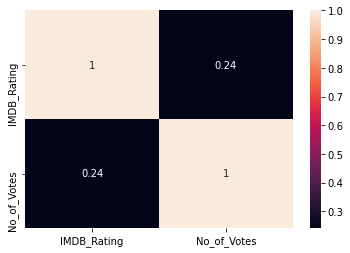

In [13]:
corelation = data.corr()
sns.heatmap(corelation, annot=True)

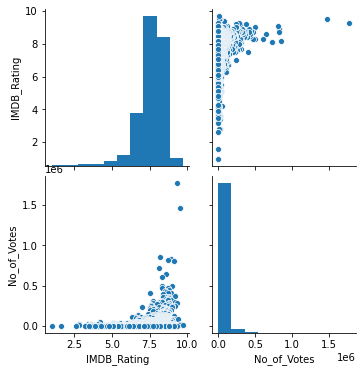

In [14]:
sns.pairplot(data)

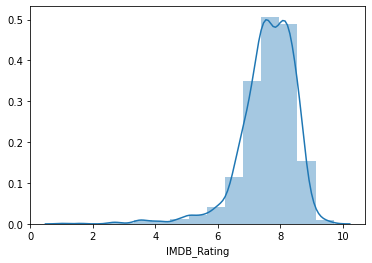

In [15]:
sns.distplot(data['IMDB_Rating'], bins=15)

In [16]:
ratings=data.sort_values(['No_of_Votes'],ascending=False)
imdb=data.sort_values(['IMDB_Rating'],ascending=False)

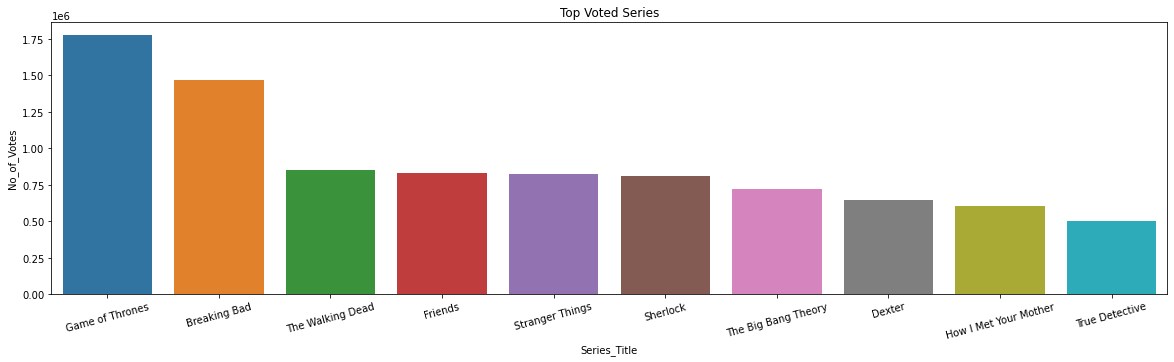

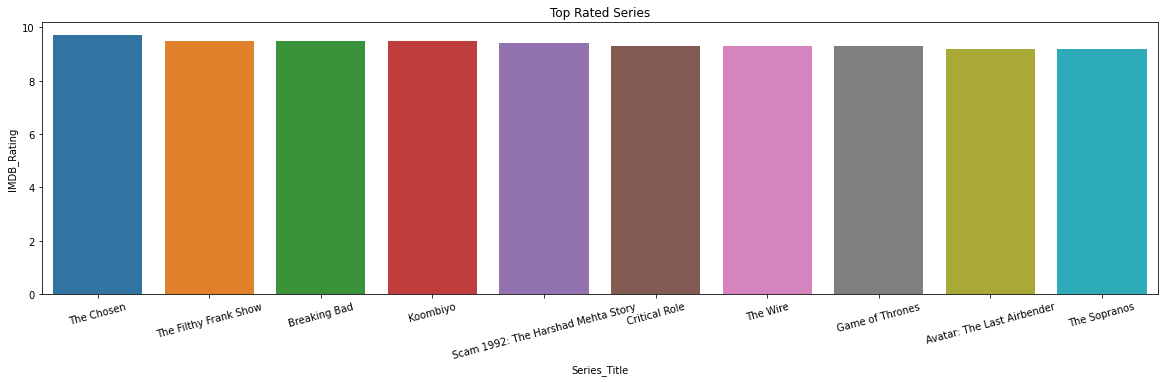

In [17]:
fig,axs=plt.subplots(figsize=(20,5))
g1=sns.barplot(x=ratings['Series_Title'][:10],y=ratings['No_of_Votes'][:10])
g1.set_title("Top Voted Series")
g1.tick_params(axis='x', labelrotation=15)

fig,axs=plt.subplots(figsize=(20,5))
g2=sns.barplot(x=imdb['Series_Title'][:10],y=imdb['IMDB_Rating'][:10])
g2.set_title("Top Rated Series")
g2.tick_params(axis='x', labelrotation=15)

plt.show()

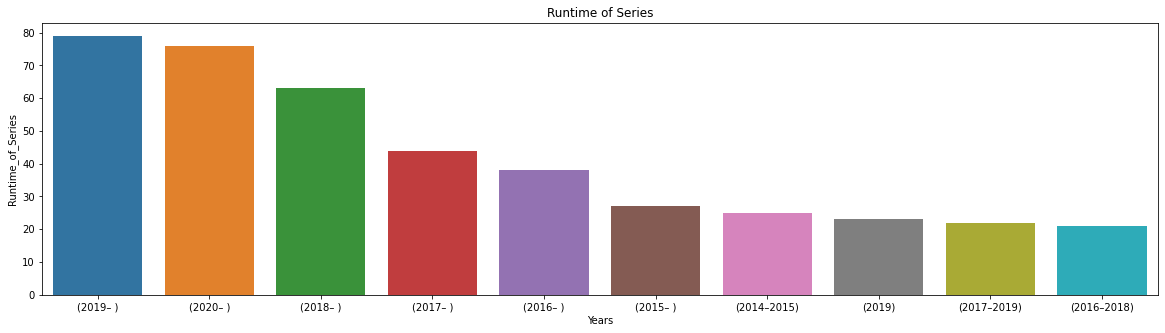

In [18]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=data['Runtime_of_Series'].value_counts()[:10].index,y=data['Runtime_of_Series'].value_counts()[:10])
g.set_title("Runtime of Series")
g.set_xlabel("Years")
plt.show()

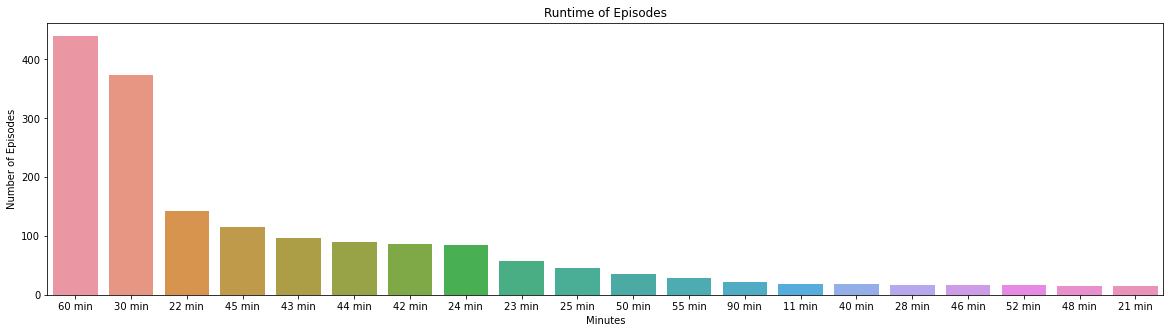

In [19]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=data['Runtime_of_Episodes'].value_counts()[:20].index,y=data['Runtime_of_Episodes'].value_counts()[:20])
g.set_title("Runtime of Episodes")
g.set_xlabel("Minutes")
g.set_ylabel("Number of Episodes")
plt.show()

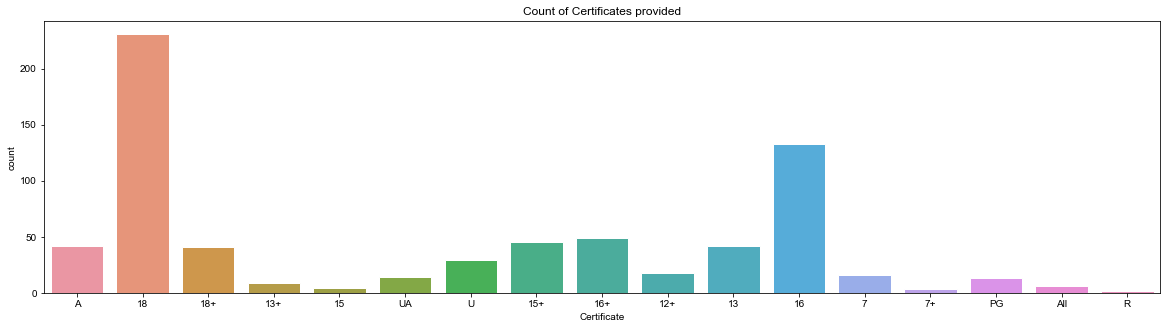

In [20]:
#As there are a lots of NaN values in the Certificate Column, renaming it to 'Not Rated'
data['Certificate']=data['Certificate'].fillna('Not Rated')

#Visualizing all the certificates except 'Not Rated' category
certi = data[data['Certificate']!='Not Rated']['Certificate']

fig,axs=plt.subplots(figsize=(20,5))
sns.set_style('darkgrid')
g=sns.countplot(certi)
g.set_title("Count of Certificates provided")
plt.show()

In [21]:
duration=[]
for x in data["Runtime_of_Series"]:
    p=re.compile('\d+')
    j=p.findall(x)
    if len(j)==2:
        duration.append(int(j[1])-int(j[0])+1)
    else:
        duration.append(2021-int(j[0])+1)
data['duration']=duration

In [22]:
print("Maximum Duration : ",max(data['duration']))
print("Minimum Duration : ",min(data['duration']))
data.head()

Maximum Duration :  65
Minimum Duration :  1


,Series_Title,Runtime_of_Series,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes,duration
0,Game of Thrones,(2011–2019),A,57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1773458,9
1,Breaking Bad,(2008–2013),18,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1468887,6
2,The Walking Dead,(2010– ),18+,44 min,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,854698,12
3,Friends,(1994–2004),13+,22 min,"Comedy, Romance",8.9,Follows the personal and professional lives of...,Jennifer Aniston,Courteney Cox,Lisa Kudrow,Matt LeBlanc,829816,11
4,Stranger Things,(2016– ),15,51 min,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...",Millie Bobby Brown,Finn Wolfhard,Winona Ryder,David Harbour,824966,6


Text(0.5, 1.0, 'Duration of series')

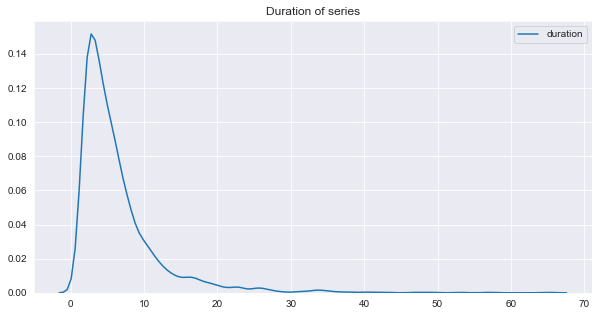

In [23]:
fig,axs=plt.subplots(figsize=(10,5))
g=sns.kdeplot(data['duration'])
g.set_title("Duration of series")

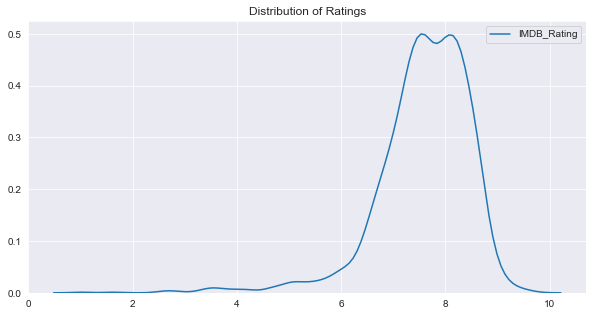

In [24]:
fig,axs=plt.subplots(figsize=(10,5))
g=sns.kdeplot(data['IMDB_Rating'])
g.set_title("Distribution of Ratings")
plt.show()

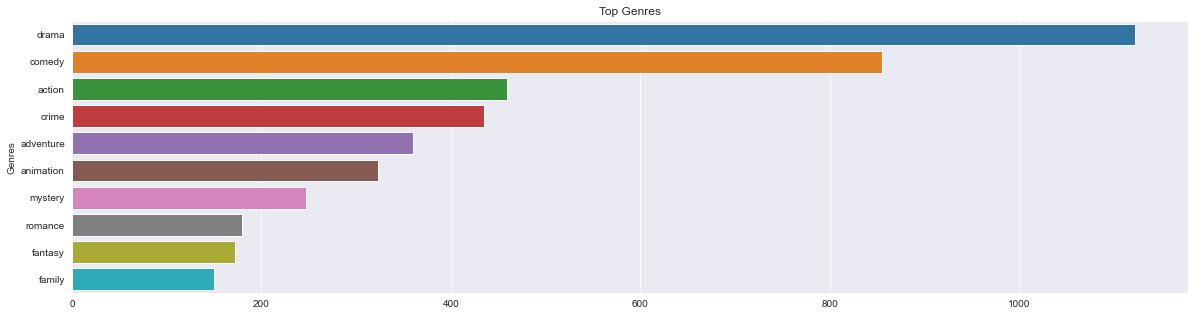

In [25]:
# Creating a list of all the Genres
genre=[]
for x in data['Genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())
        
# Finding the Count of these Genres
count=Counter(genre)
count=count.most_common()[:10]
x,y=map(list,zip(*count))

# Visualizing the plot
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(y,x)
g.set_ylabel("Genres")
g.set_title("Top Genres")
plt.show()

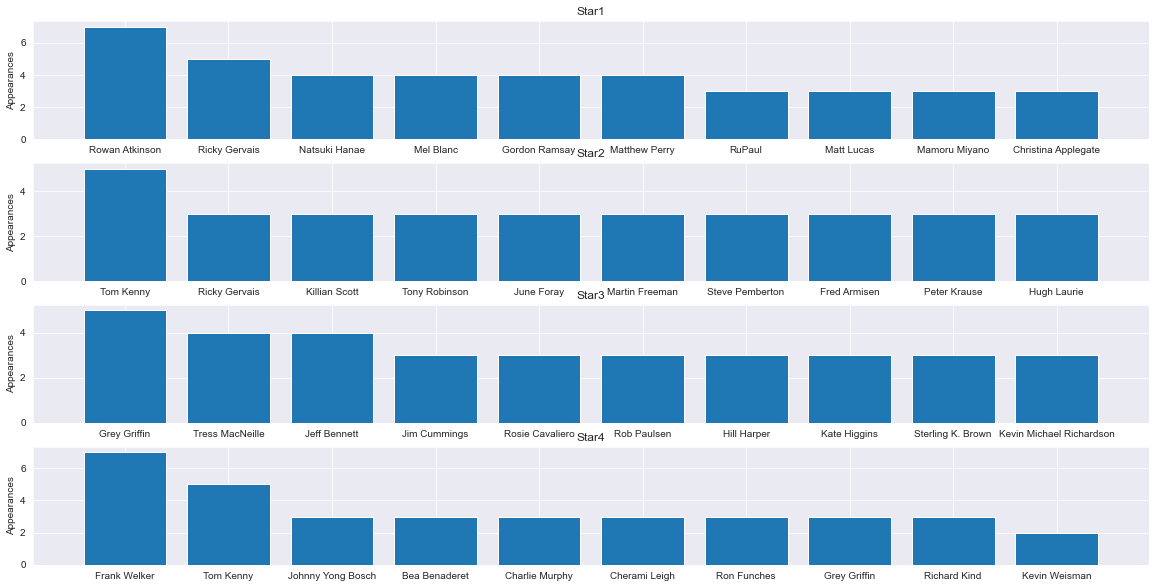

In [36]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,10))
ax=0
for x in stars:
    axs[ax].bar(data[x].value_counts()[:10].index,data[x].value_counts()[:10])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances")
    ax+=1

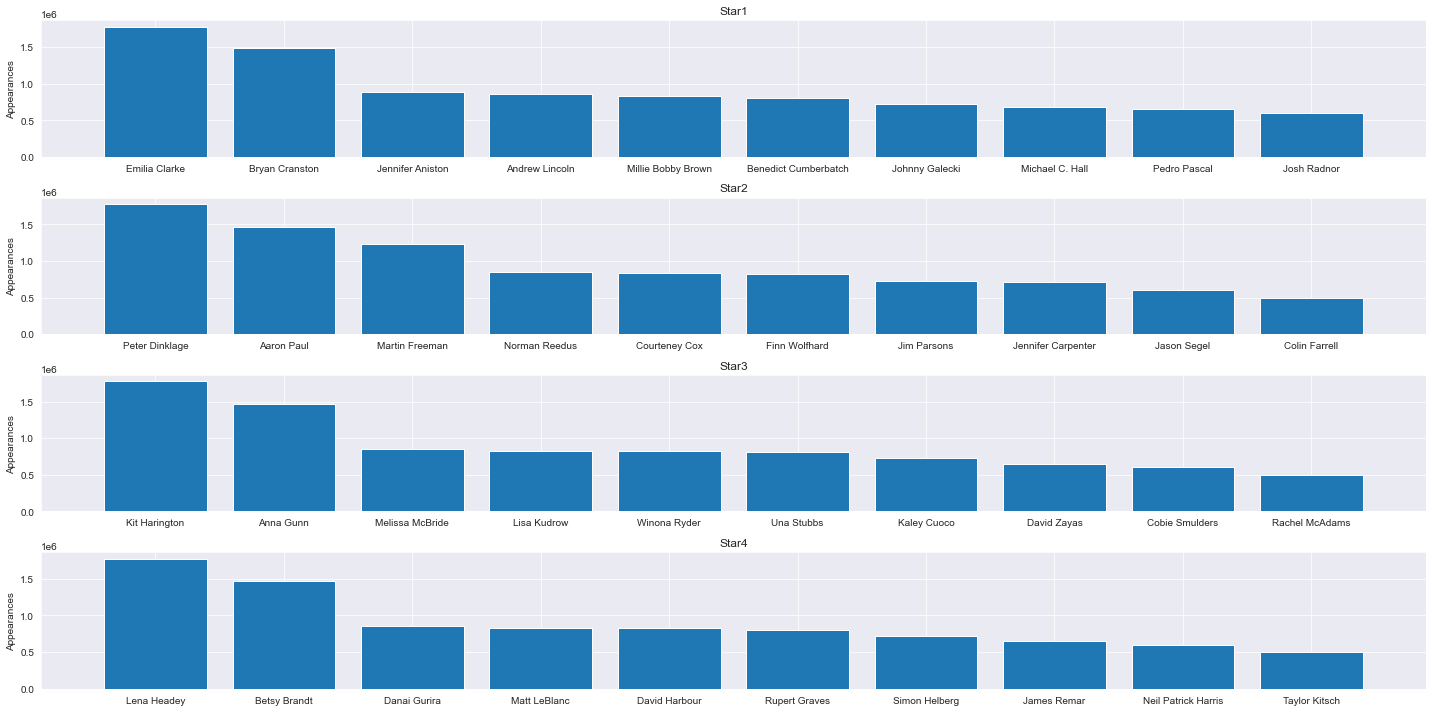

In [37]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,10))
ax=0
for x in stars:
    s=data.groupby([x]).sum().reset_index()
    d=s.sort_values(['No_of_Votes'],ascending=False)[:10]
    axs[ax].bar(d[x],d['No_of_Votes'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances")
    ax+=1
    plt.tight_layout()

In [29]:
#Importing TfidVectorizer and to generate the matrix
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(stop_words='english')
cvm=cv.fit_transform(data['Overview'])
cvm.shape

(2000, 8089)

In [30]:
#Importing linear_kernel to find the similarity of the data
from sklearn.metrics.pairwise import linear_kernel
sim=linear_kernel(cvm,cvm)

In [31]:
indices=pd.Series(data.index,index=data['Series_Title']).drop_duplicates()

In [32]:
def get_recommendations(title, sim=sim):
    idx = indices[title]
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data['Series_Title'].iloc[movie_indices]

In [33]:
get_recommendations('Friends')

510             Ally McBeal
244          Master of None
688             Derry Girls
859     The Drew Carey Show
47           Grey's Anatomy
1973      Good Girls Revolt
406            Chicago Fire
1989                  6Teen
1803           The Muppets.
359               The Knick
Name: Series_Title, dtype: object

In [34]:
get_recommendations('Suits')

566                           Spin City
972                         Paradise PD
1181    Harvey Birdman, Attorney at Law
46                             Seinfeld
589                        Nurse Jackie
1823                               High
38                             The Wire
572                             Poldark
1840                        Harry's Law
397                               Power
Name: Series_Title, dtype: object